# Forest Cover Type Prediction

## Life cycle of Machine Learning Project
* Understanding the problem statement
* Data Collection
* Data Cleaning
* Exploratory Data Analysis
* Data Pre-processing
* Model Training
* Choose best model

## Dataset Description
The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

1. - Spruce/Fir
2. - Lodgepole Pine
3. - Ponderosa Pine
4. - Cottonwood/Willow
5. - Aspen
6. - Douglas-fir
7. - Krummholz

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. You must predict the Cover_Type for every row in the test set (565892 observations).

Data Fields
* Elevation - Elevation in meters
* Aspect - Aspect in degrees azimuth
* Slope - Slope in degrees
* Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
* Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
* Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
* Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
* Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
* Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
* Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
* Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
* Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
* aCover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

The wilderness areas are:

1. - Rawah Wilderness Area
2. - Neota Wilderness Area
3. - Comanche Peak Wilderness Area
4. - Cache la Poudre Wilderness Area

The soil types are:

1. Cathedral family - Rock outcrop complex, extremely stony.
2. Vanet - Ratake families complex, very stony.
3. Haploborolis - Rock outcrop complex, rubbly.
4. Ratake family - Rock outcrop complex, rubbly.
5. Vanet family - Rock outcrop complex complex, rubbly.
6. Vanet - Wetmore families - Rock outcrop complex, stony.
7. Gothic family.
8. Supervisor - Limber families complex.
9. Troutville family, very stony.
10. Bullwark - Catamount families - Rock outcrop complex, rubbly.
11. Bullwark - Catamount families - Rock land complex, rubbly.
12. Legault family - Rock land complex, stony.
13. Catamount family - Rock land - Bullwark family complex, rubbly.
14. Pachic Argiborolis - Aquolis complex.
15. unspecified in the USFS Soil and ELU Survey.
16. Cryaquolis - Cryoborolis complex.
17. Gateview family - Cryaquolis complex.
18. Rogert family, very stony.
19. Typic Cryaquolis - Borohemists complex.
20. Typic Cryaquepts - Typic Cryaquolls complex.
21. Typic Cryaquolls - Leighcan family, till substratum complex.
22. Leighcan family, till substratum, extremely bouldery.
23. Leighcan family, till substratum - Typic Cryaquolls complex.
24. Leighcan family, extremely stony.
25. Leighcan family, warm, extremely stony.
26. Granile - Catamount families complex, very stony.
27. Leighcan family, warm - Rock outcrop complex, extremely stony.
28. Leighcan family - Rock outcrop complex, extremely stony.
29. Como - Legault families complex, extremely stony.
30. Como family - Rock land - Legault family complex, extremely stony.
31. Leighcan - Catamount families complex, extremely stony.
32. Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
33. Leighcan - Catamount families - Rock outcrop complex, extremely stony.
34. Cryorthents - Rock land complex, extremely stony.
35. Cryumbrepts - Rock outcrop - Cryaquepts complex.
36. Bross family - Rock land - Cryumbrepts complex, extremely stony.
37. Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
38. Leighcan - Moran families - Cryaquolls complex, extremely stony.
39. Moran family - Cryorthents - Leighcan family complex, extremely stony.
40. Moran family - Cryorthents - Rock land complex, extremely stony.

Target Class Labels

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# from ucimlrepo import fetch_ucirepo

# # fetch dataset
# covertype = fetch_ucirepo(id=31)

In [3]:
# df = pd.concat([covertype.data.features , covertype.data.targets],axis=1)

In [4]:
# df.to_csv('covertype.csv', index=False)

In [5]:
df = pd.read_csv('covertype.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Soil_Type1                          581012 non-null 

In [7]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [8]:
df.tail()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,1,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,1,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,1,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,1,0,3
581011,2383,165,13,60,4,67,231,244,141,875,...,0,0,0,0,0,0,0,1,0,3


In [9]:
df.shape

(581012, 55)

In [10]:
# Check duplicates
df[df.duplicated()]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type


## Remove unnecessary columns

In [11]:
df1 = df.copy()
# Remove unnecessary columns
remove_columns = []

# std = 0 are constant columns, they don't help in prediction process so we can remove them
for column in df1.columns:
    if df1[column].std() <= 0.02: # std is zero
        remove_columns.append(column)

# drop columns
df1.drop(remove_columns, axis=1, inplace=True)

print(f"Removed columns: {remove_columns}")

Removed columns: ['Soil_Type7', 'Soil_Type8', 'Soil_Type15', 'Soil_Type36']


Restoring original values for better analysis

*the target variable of our data i.e Cover_Type is one hot encoded*

*As our data is already preprocessed but will replace the foresteric values back to their original values for better analysis and data visualization*


Dispaly summary statistics

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,581012.0,2959.365301,279.984734,1859.0,2809.0,2996.0,3163.0,3858.0
Aspect,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
Slope,581012.0,14.103704,7.488242,0.0,9.0,13.0,18.0,66.0
Horizontal_Distance_To_Hydrology,581012.0,269.428217,212.549356,0.0,108.0,218.0,384.0,1397.0
Vertical_Distance_To_Hydrology,581012.0,46.418855,58.295232,-173.0,7.0,30.0,69.0,601.0
Horizontal_Distance_To_Roadways,581012.0,2350.146611,1559.254870,0.0,1106.0,1997.0,3328.0,7117.0
Hillshade_9am,581012.0,212.146049,26.769889,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,581012.0,223.318716,19.768697,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,581012.0,142.528263,38.274529,0.0,119.0,143.0,168.0,254.0
Horizontal_Distance_To_Fire_Points,581012.0,1980.291226,1324.195210,0.0,1024.0,1710.0,2550.0,7173.0


## Statistical Inference
* Soil type 7,15,8 and 36 are constant (each value is zero) , so they can be removed
* Wilderness_Area and Soil_Type are onehot encoded. Hence, they could be converted back for some analysis
* Scales are not the same for all. Hence, rescalling and standardization may be necessary for some algorithms.

## Check Datatypes in the dataset

In [13]:
### check null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Soil_Type1                          581012 non-null 

### Inference
* Count is 581012 for each column, so no data point is missing

## Restoring original values for better analysis
***The Target variable in our df is Cover_Type is onehot encoded***.
***As our data is already preprocessed but we will replace the values to their original values for better analysis and data visualtization***  

In [14]:
df['Cover_Type'].replace({1: 'Spruce/Fir', 2: 'Lodgepole Pine', 3: 'Ponderosa Pine', 4: 'Cottonwood/Willow', 5: 'Aspen', 6: 'Douglas-fir', 7: 'Krummholz'}, inplace=True)

In [15]:
df = df.rename(columns={"Wilderness_Area1": "Rawah_WA", "Wilderness_Area2": "Neota_WA", "Wilderness_Area3": "Comanche_Peak_WA", "Wilderness_Area4": "Cache_la_Poudre_WA",
                   'Horizontal_Distance_To_Hydrology':"HD_Hydrology","Vertical_Distance_To_Hydrology":"VD_Hyrdology","Horizontal_Distance_To_Roadways":"HD_Roadways",
                   "Horizontal_Distance_To_Fire_Points":"HD_Fire_Points"})

In [16]:
df2 = df.copy()
df2["Wild Areas"] = (df2.iloc[:, [10, -4, -3, -2]] == 1).idxmax(1)
df2["Soil types"] = (df2.iloc[:, 11:-4] == 1).idxmax(1)
df2["Wild Areas"].unique()

array(['Rawah_WA', 'Comanche_Peak_WA', 'Cache_la_Poudre_WA', 'Neota_WA'],
      dtype=object)

## Drop columns which are not required

In [17]:
df2 = df2.drop(columns=['Rawah_WA', 'Neota_WA', 'Comanche_Peak_WA', 'Cache_la_Poudre_WA',
                        'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40'])

In [18]:
df = df2

In [19]:
df.head()

,Elevation,Aspect,Slope,HD_Hydrology,VD_Hyrdology,HD_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,HD_Fire_Points,Cover_Type,Wild Areas,Soil types
0,2596,51,3,258,0,510,221,232,148,6279,Aspen,Rawah_WA,Soil_Type29
1,2590,56,2,212,-6,390,220,235,151,6225,Aspen,Rawah_WA,Soil_Type29
2,2804,139,9,268,65,3180,234,238,135,6121,Lodgepole Pine,Rawah_WA,Soil_Type12
3,2785,155,18,242,118,3090,238,238,122,6211,Lodgepole Pine,Rawah_WA,Soil_Type30
4,2595,45,2,153,-1,391,220,234,150,6172,Aspen,Rawah_WA,Soil_Type29


In [20]:
df.shape

(581012, 13)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Elevation       581012 non-null  int64 
 1   Aspect          581012 non-null  int64 
 2   Slope           581012 non-null  int64 
 3   HD_Hydrology    581012 non-null  int64 
 4   VD_Hyrdology    581012 non-null  int64 
 5   HD_Roadways     581012 non-null  int64 
 6   Hillshade_9am   581012 non-null  int64 
 7   Hillshade_Noon  581012 non-null  int64 
 8   Hillshade_3pm   581012 non-null  int64 
 9   HD_Fire_Points  581012 non-null  int64 
 10  Cover_Type      581012 non-null  object
 11  Wild Areas      581012 non-null  object
 12  Soil types      581012 non-null  object
dtypes: int64(10), object(3)
memory usage: 57.6+ MB


## 3. Exploring Data

In [22]:
# Define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

# print columns
print("We have {} numerical features: {}".format(len(numeric_features), numeric_features))
print("We have {} categorical features: {}".format(len(categorical_features), categorical_features))

We have 10 numerical features: ['Elevation', 'Aspect', 'Slope', 'HD_Hydrology', 'VD_Hyrdology', 'HD_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'HD_Fire_Points']
We have 3 categorical features: ['Cover_Type', 'Wild Areas', 'Soil types']


### Univariate Analysis

The term univariate refers to the analysis of one variable prefix "uni" means "one". The purpose of univarate analysis is understand the distribution of values for a single variable

### Numerical Features

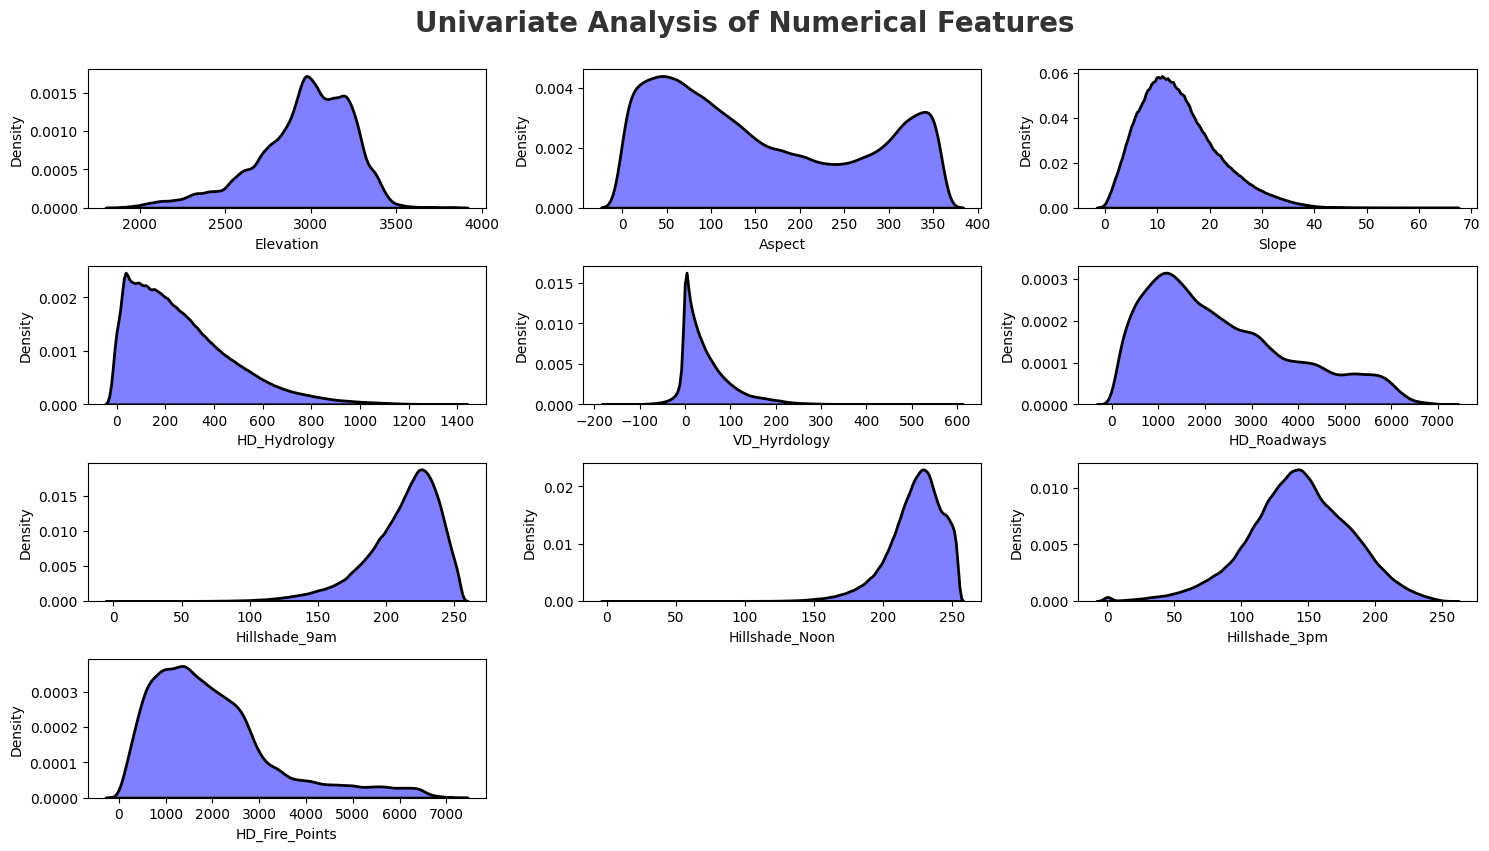

In [23]:
plt.figure(figsize=(15, 10))
plt.suptitle("Univariate Analysis of Numerical Features", fontsize=20, fontweight='bold', alpha=0.8 , y=1)
for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(df[numeric_features[i]], color='blue', shade=True, alpha=0.5, linewidth=2, edgecolor='k')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

### Categorical Features

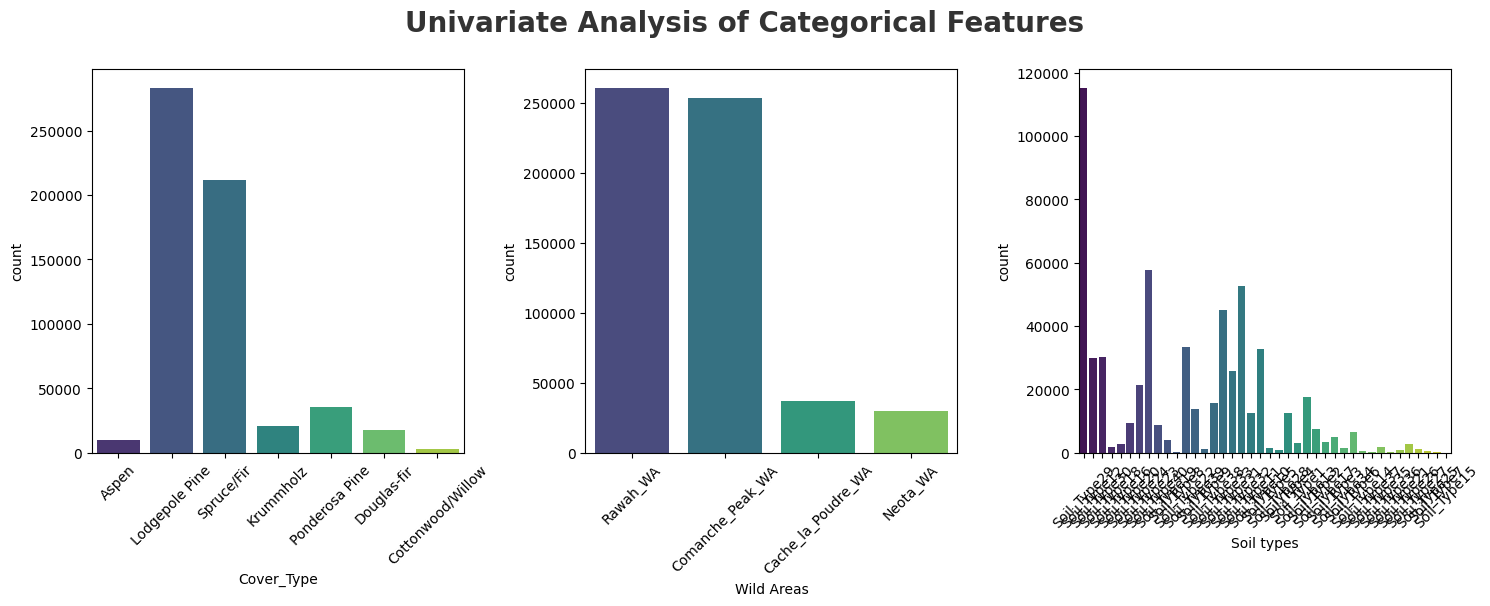

In [24]:
# categorical columns
plt.figure(figsize=(15, 10))
plt.suptitle("Univariate Analysis of Categorical Features", fontsize=20, fontweight='bold', alpha=0.8 , y=1)

for i in range(0, len(categorical_features)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[categorical_features[i]], data=df, palette='viridis')
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

### Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable

In [25]:
discrete_features = [feature for feature in numeric_features if len(df[feature].unique()) < 25 and len(df[feature].unique()) > 3]
continuous_features = [feature for feature in numeric_features if len(df[feature].unique()) > 25]
encoded_categorical = [feature for feature in categorical_features if len(df[feature].unique()) <=3]

print("We have {} discrete features: {}".format(len(discrete_features), discrete_features))
print("We have {} continuous features: {}".format(len(continuous_features), continuous_features))
print("We have {} encoded categorical features: {}".format(len(encoded_categorical), encoded_categorical))

We have 0 discrete features: []
We have 10 continuous features: ['Elevation', 'Aspect', 'Slope', 'HD_Hydrology', 'VD_Hyrdology', 'HD_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'HD_Fire_Points']
We have 0 encoded categorical features: []


### Check Multicollinearity in Numerica features

In [26]:
df[continuous_features[1:]].corr()

,Aspect,Slope,HD_Hydrology,VD_Hyrdology,HD_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,HD_Fire_Points
Aspect,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172
Slope,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662
HD_Hydrology,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874
VD_Hyrdology,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913
HD_Roadways,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580
Hillshade_9am,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669
Hillshade_Noon,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329
Hillshade_3pm,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981
HD_Fire_Points,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000


<Axes: >

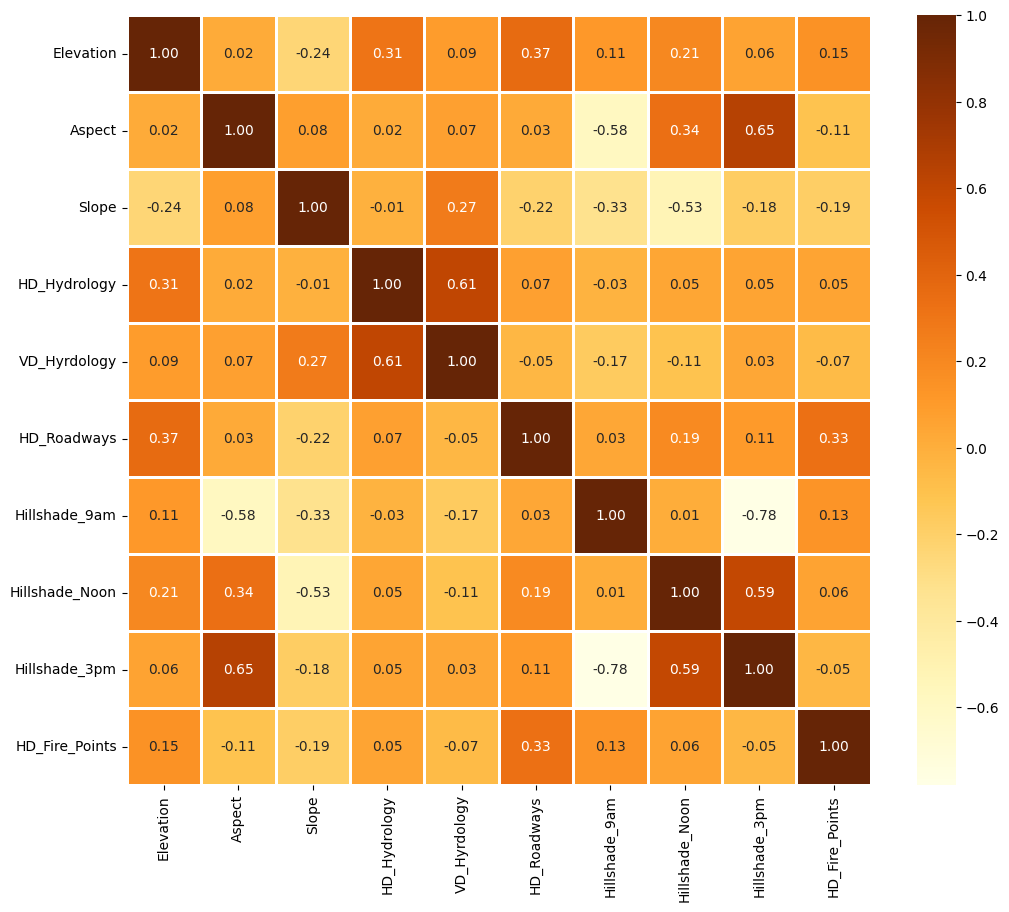

In [27]:
fig = plt.figure(figsize=(12, 10))
sns.heatmap(df[continuous_features].corr(), annot=True, cmap='YlOrBr', fmt='.2f', linewidths=2)

Inference (Correlated features):
- Aspect and Hillshade at 9am
- Aspect and Hillshade at 3pm
- Slope and Hillshade at noon
- Horizontal distance to hydrology and vertical distance to hydrology
- Hillshade at 9am and Hillshade at 3pm

Check Multicollinearity among Categorical Features

* A chi-squared test is a statistical hypotehsis test that is valid to perform when the test statistic is chi-squared distribution under the null hypothesis, specifically Pearson's Chi-sqaured test
* A chi-squared statistic is one way to show a relationship between two categorical variables.
* Here we test correlation of Categorical columns with Target column i.e. Prod Taken

##### Null Hypothesis(Ho): The feature is independent to the target column (No-Correlation)
##### Alternative Hypothesis(Ha): The feature and the target column are not independent (Correlation)

In [28]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['Cover_Type'], df[feature]))[1] < 0.05:
        chi2_test.append("Reject Null Hypothesis")
    else:
        chi2_test.append("Fail to Reject Null Hypothesis")
results = pd.DataFrame(data = [categorical_features, chi2_test]).T
results.columns = ['Column', 'Hypothesis Result']
results

,Column,Hypothesis Result
0,Cover_Type,Reject Null Hypothesis
1,Wild Areas,Reject Null Hypothesis
2,Soil types,Reject Null Hypothesis


### Checking Null values

In [29]:
df.isnull().sum()

Elevation         0
Aspect            0
Slope             0
HD_Hydrology      0
VD_Hyrdology      0
HD_Roadways       0
Hillshade_9am     0
Hillshade_Noon    0
Hillshade_3pm     0
HD_Fire_Points    0
Cover_Type        0
Wild Areas        0
Soil types        0
dtype: int64

### How is the data distribution of our target column 'Cover_Type'?

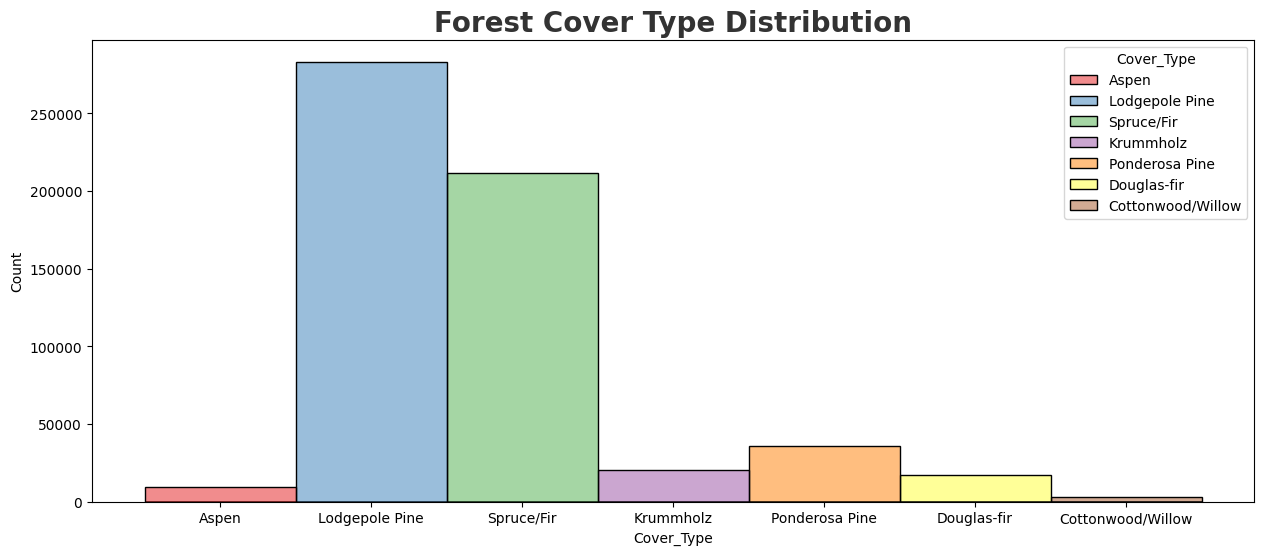

In [30]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='Cover_Type', hue='Cover_Type', palette='Set1')
plt.title("Forest Cover Type Distribution", fontsize=20, fontweight='bold', alpha=0.8)
plt.show()

#### Inference
- We can see that 'Lodgepole Pine' has the largest forest cover
- 'Cottonwood/Willow' has the lowest forest cover

#### Which wild area has what kind of Forest Cover?

<Axes: xlabel='Wild Areas'>

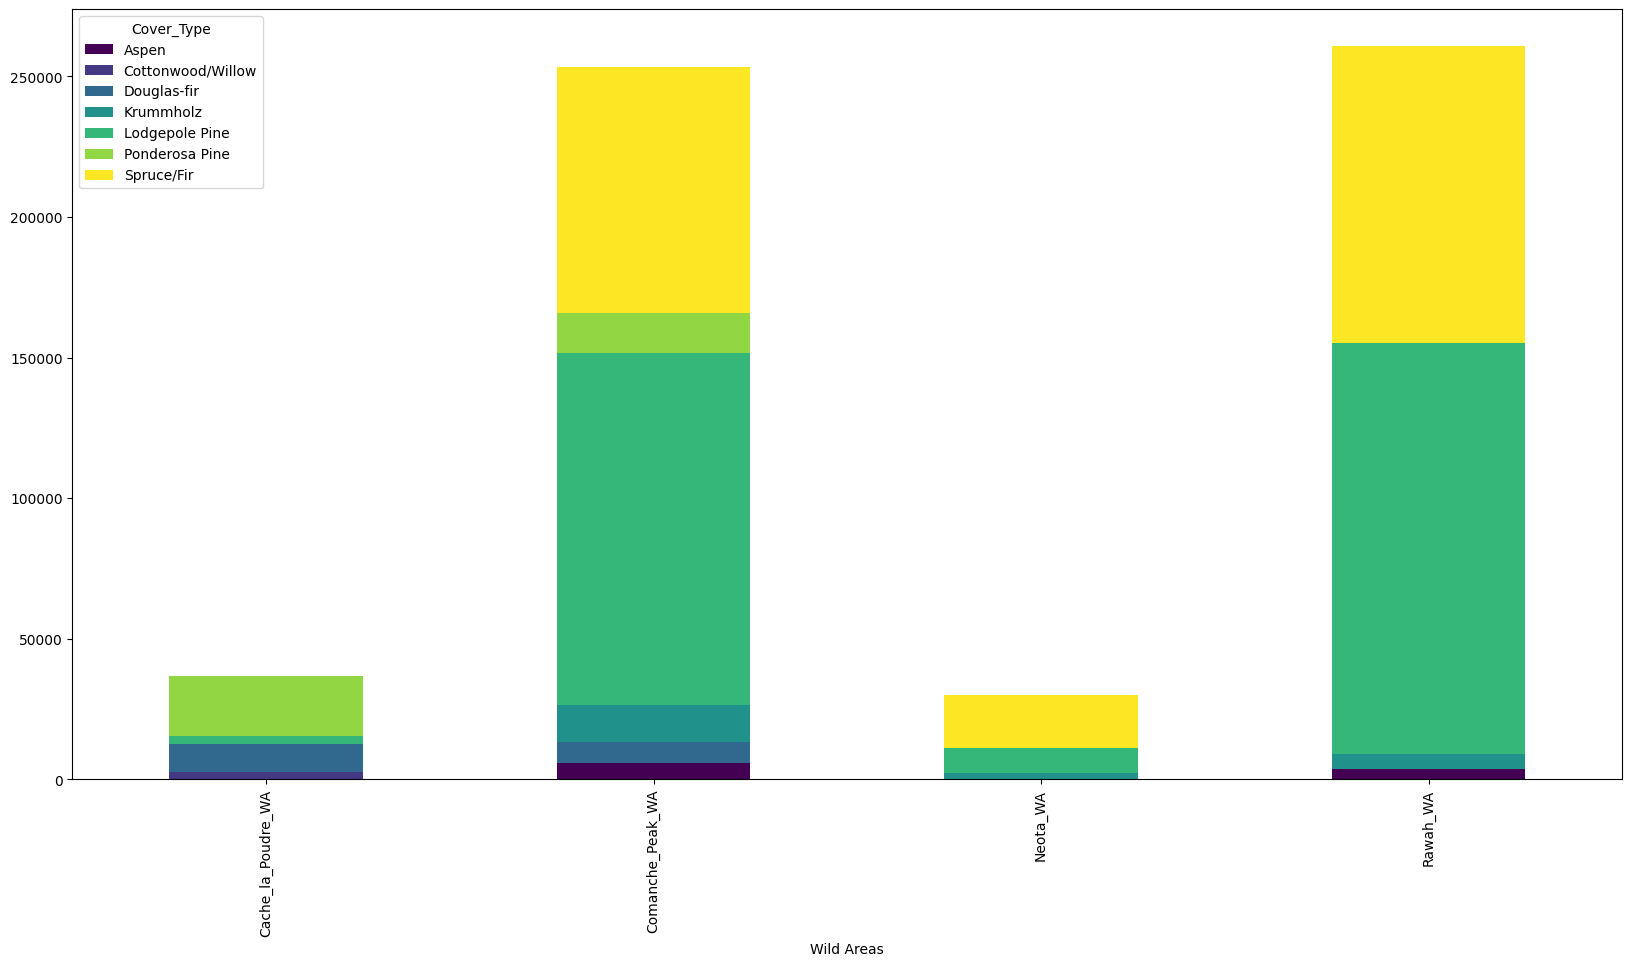

In [31]:
wild_area_cover_type = df.groupby('Wild Areas')['Cover_Type'].value_counts().unstack()
wild_area_cover_type.plot(kind='bar', stacked=True, figsize=(20, 10), colormap='viridis')

**INFERENCE**
* Cache_la_Pouder amd Neotal Wilderness areas have same number of forest cover
* Comanche_Peak accounts for 42% of the total wild areas data
* The least data is for Neota Wild Area i.e. 3.3% in our data
* We can also see none of the wild areas have all type of forest cover

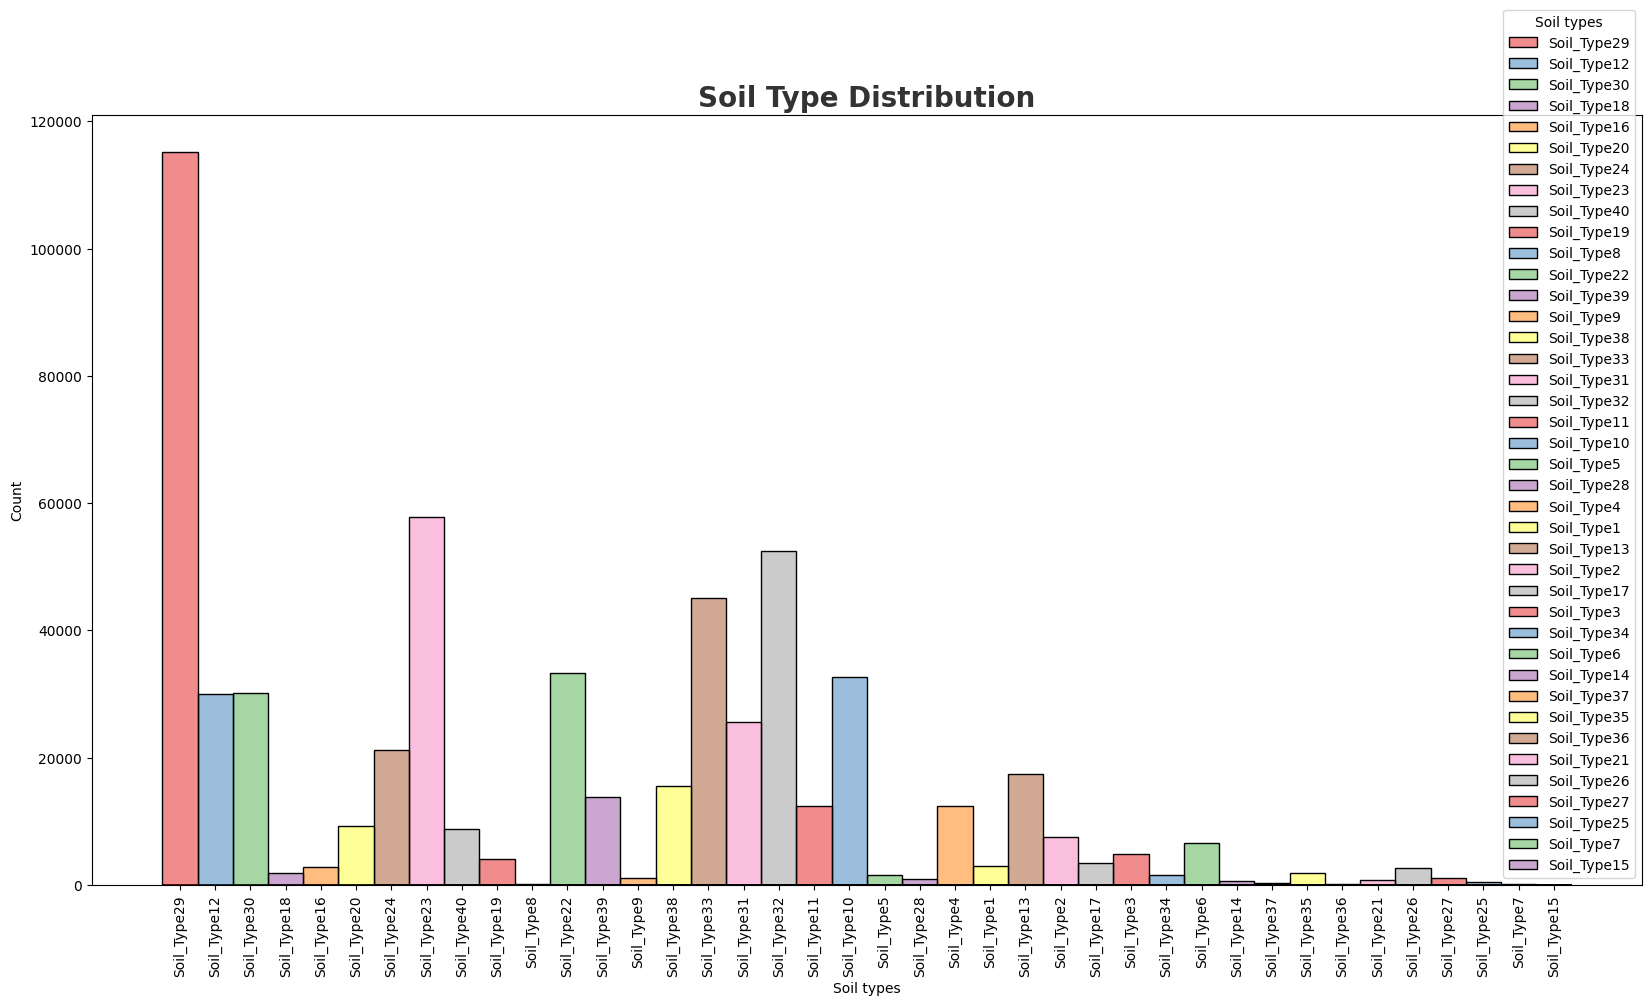

In [32]:
# Soil type distribution
plt.figure(figsize=(20, 10))
sns.histplot(x='Soil types',hue='Soil types', data=df, palette='Set1')
plt.title("Soil Type Distribution", fontsize=20, fontweight='bold', alpha=0.8)
plt.xticks(rotation=90)
plt.show()

**INFERENCE**
- We have most of the data of soil types 29 and 23
- Many soil types are rare in our data

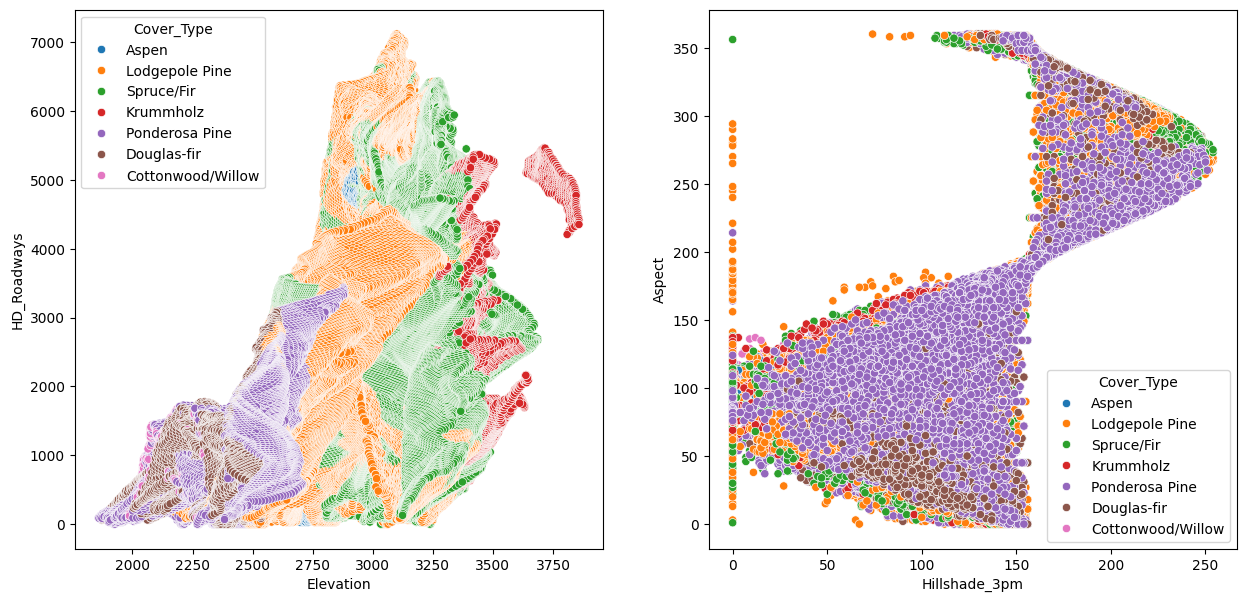

In [33]:
# Bivariate Analysis
fig , axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.scatterplot(x='Elevation', y='HD_Roadways', data=df, hue='Cover_Type')
plt.subplot(122)
sns.scatterplot(x='Hillshade_3pm', y='Aspect', data=df, hue='Cover_Type')
plt.show()

**INFERENCE**
- Positive correlation between Elevation and Distance to Roadways
- Cottonwood trees have the lowest elevation and distance to roadways compared to other forest cover
- Douglas tree grows on lower elevated areas but higher than compared to cottonwood trees
- All Krummholtz trees grow on higher elevated areas but we can see a variation in their distance to roadways values


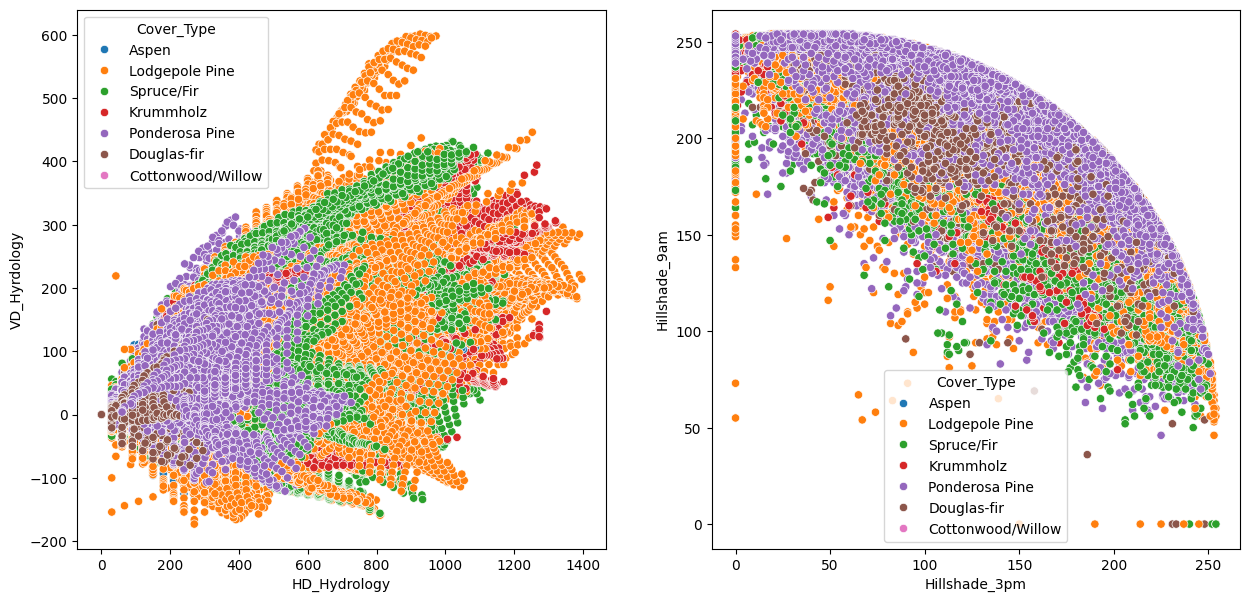

In [34]:
fig , axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.scatterplot(x='HD_Hydrology', y='VD_Hyrdology', data=df, hue='Cover_Type')
plt.subplot(122)
sns.scatterplot(x='Hillshade_3pm', y='Hillshade_9am', data=df, hue='Cover_Type')
plt.show()

Inference
* We can see positive correlation between both the distances to hydrology
* This graph is obvious as the shade at 9am will be opposite to the shade at 3pm on the area
* We can see a negative correlation between hillshade index at 9am and 3pm

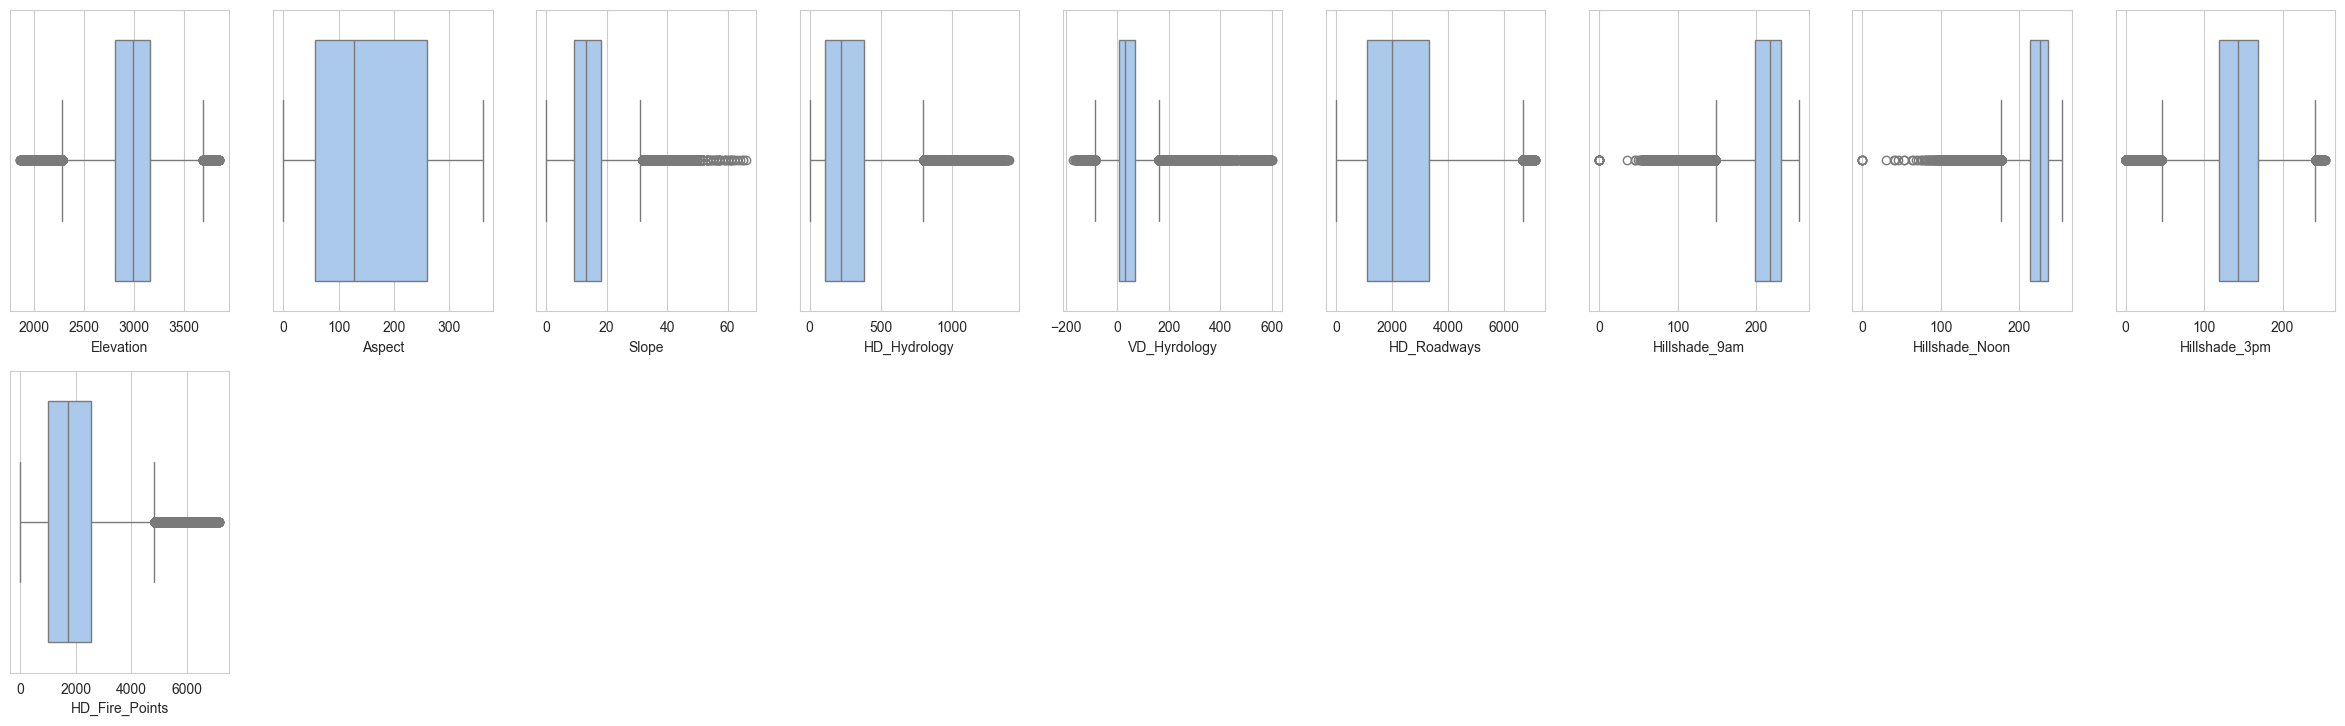

In [35]:
sns.set_style('whitegrid')
color = sns.color_palette('pastel')
plt.figure(figsize=(30, 18))
for i, col in enumerate(numeric_features):
    plt.subplot(4,9,i+1)
    sns.boxplot(df[col],orient='h',palette=color)

Inference
* Slope is the most squeezed box plot. It is having least range meaning that the median and the mean will be quiet close
* Aspect features is the only one with little to none outliers
* Elevation is the only feature that doesn't have a minimum value of 0. It is instead plotted in the middle having many outliers
* Horizontal_Distance_to_Roadways has the most spread out data of all features. This is because it has highest standard deviation score.
Horizontal_Distance_To_Fire_Ponts has a similar look, but it has the maximum value.
* If we compare these two features, the last 50% of Horizontal_Distance_To_Roadways is much more spread and less dense compared to Horizontal_Distance_To_Fire_Points, hence having a high standard deviation score.

Violin Plot
- Graphical represenation of the distribution of a numeric variable
- The violin plot shows the distribution of the data, including the shape of the distribution, the center of the data, the spread of the data and whether the data is symmetric or skewed

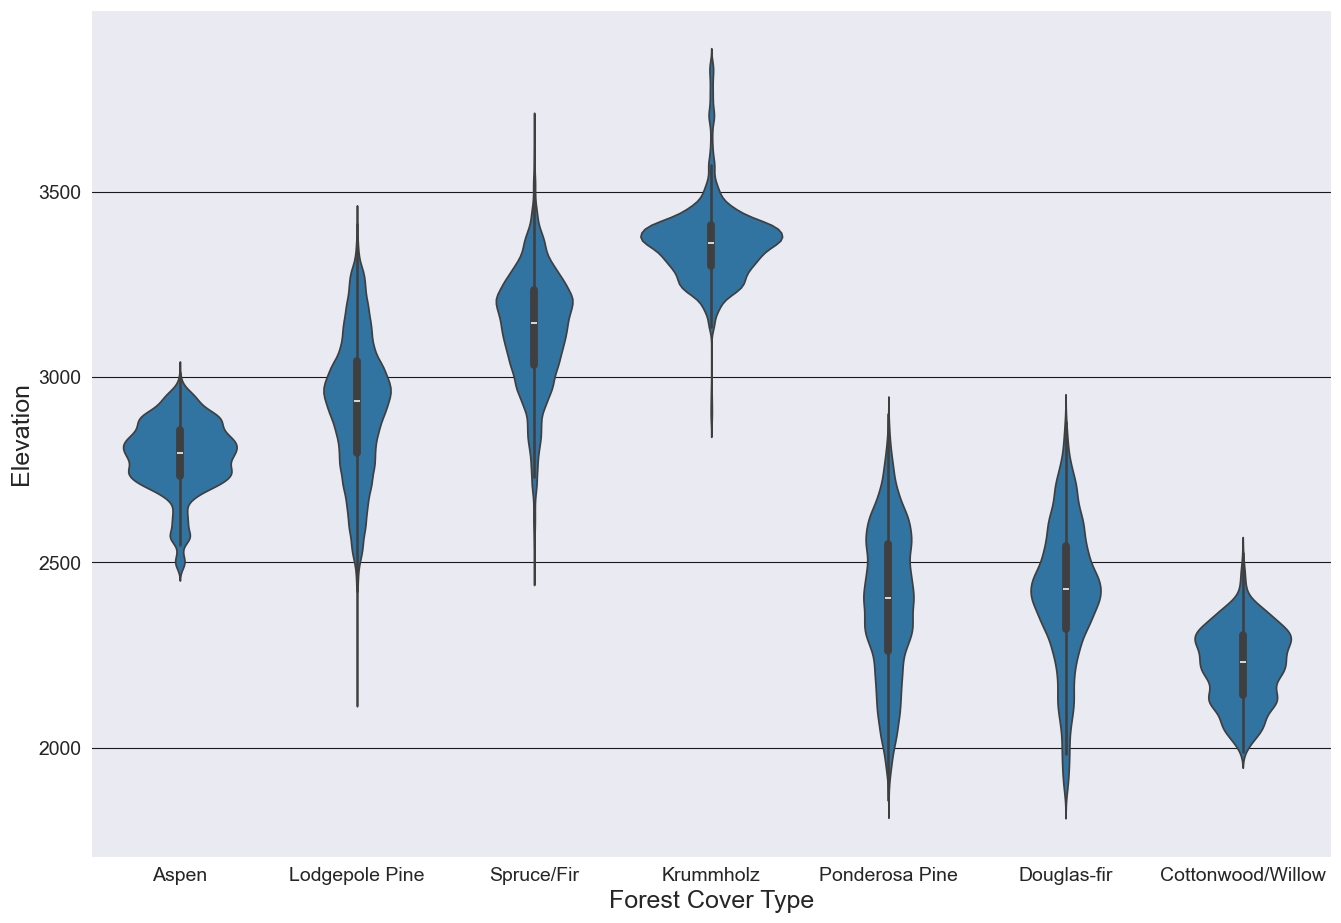

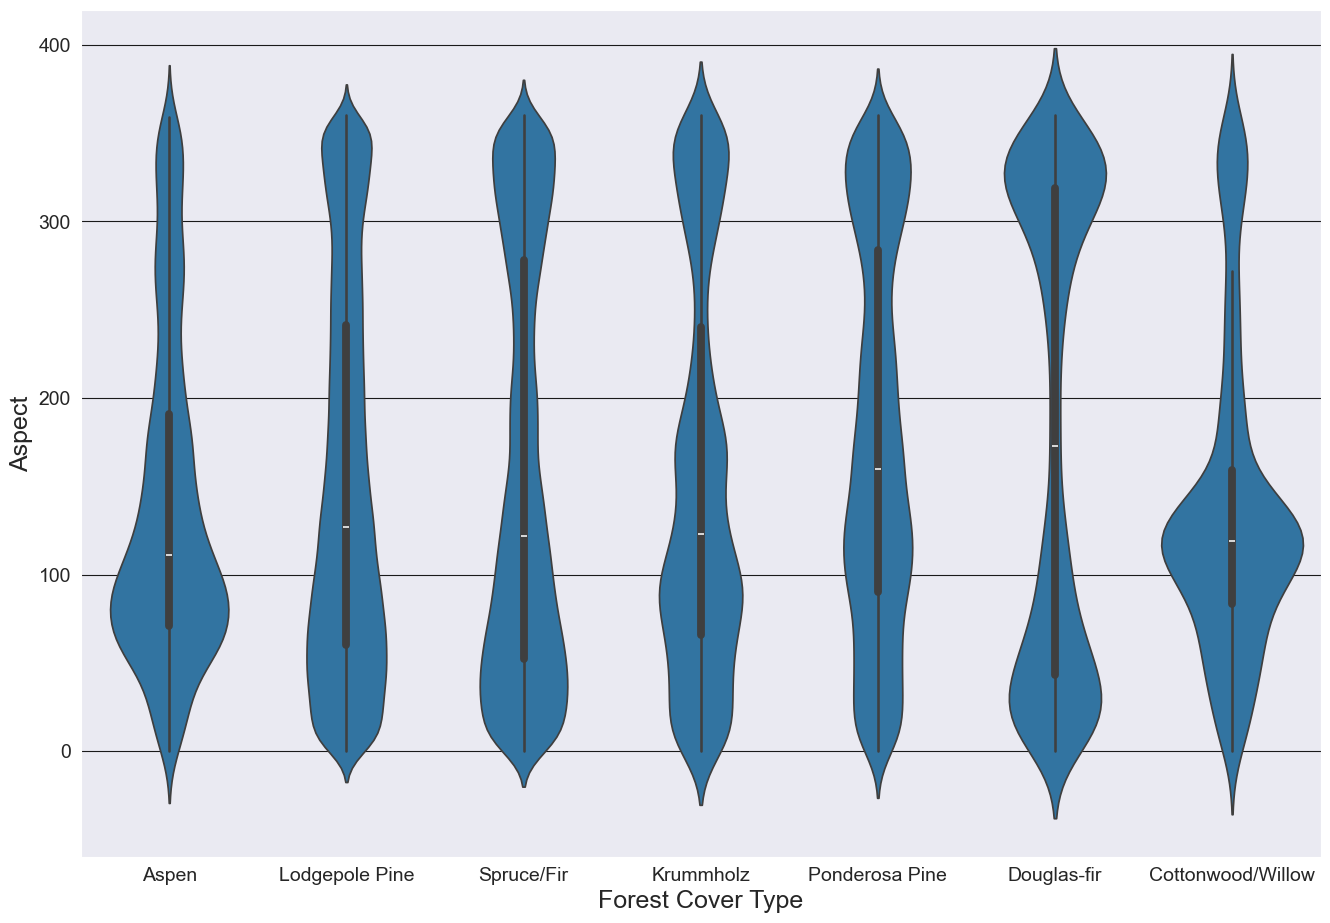

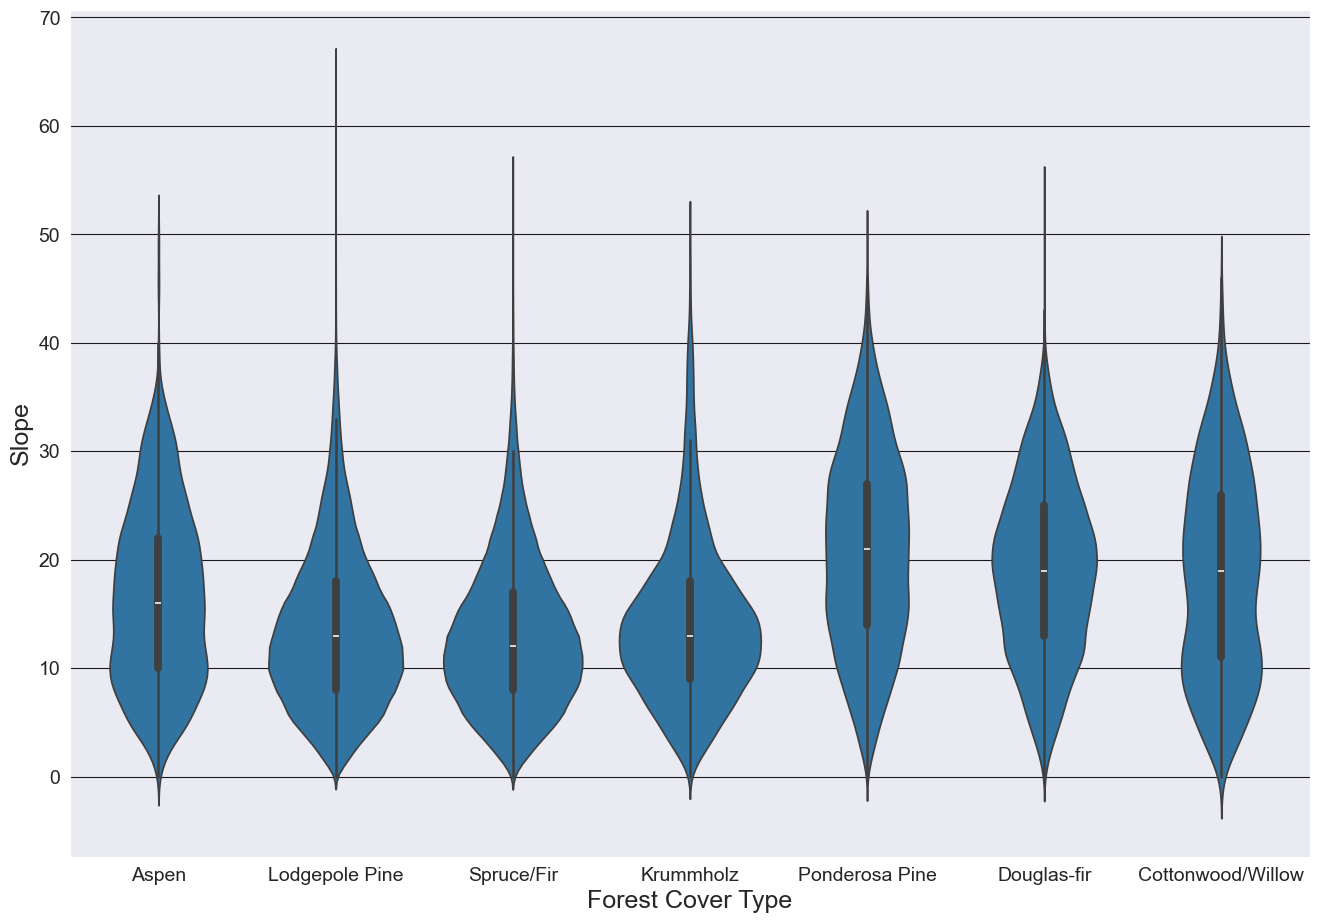

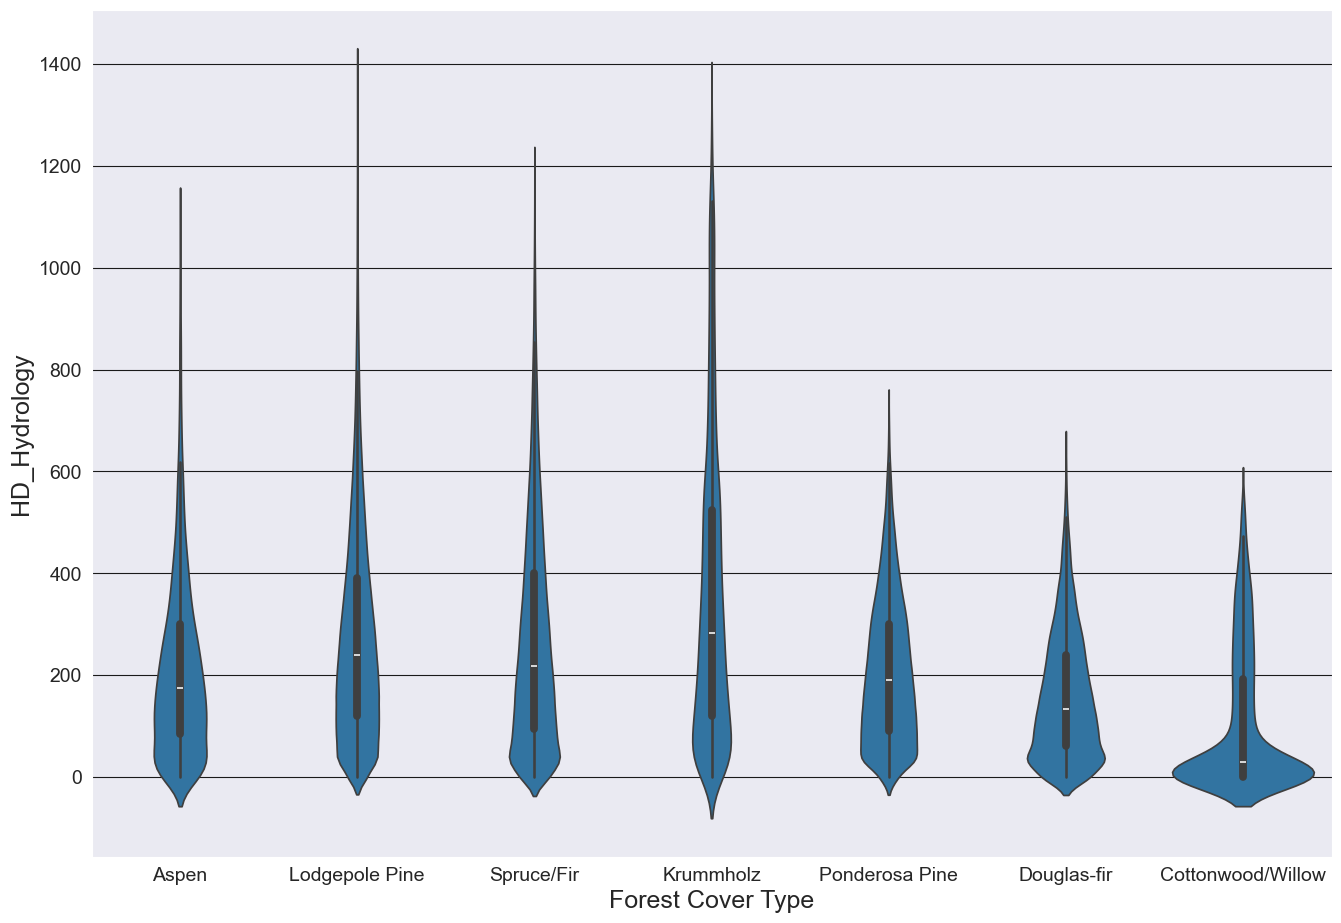

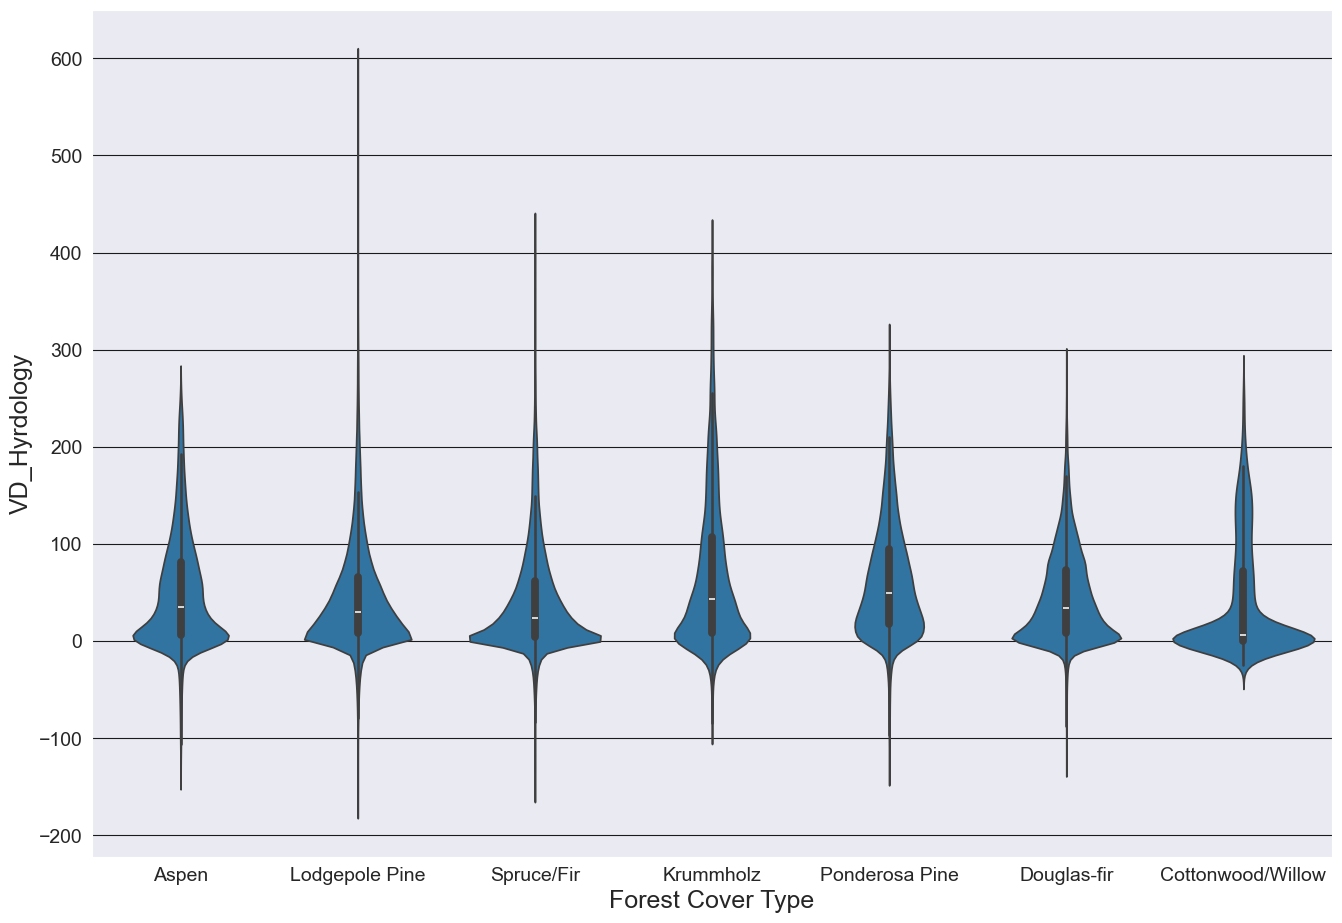

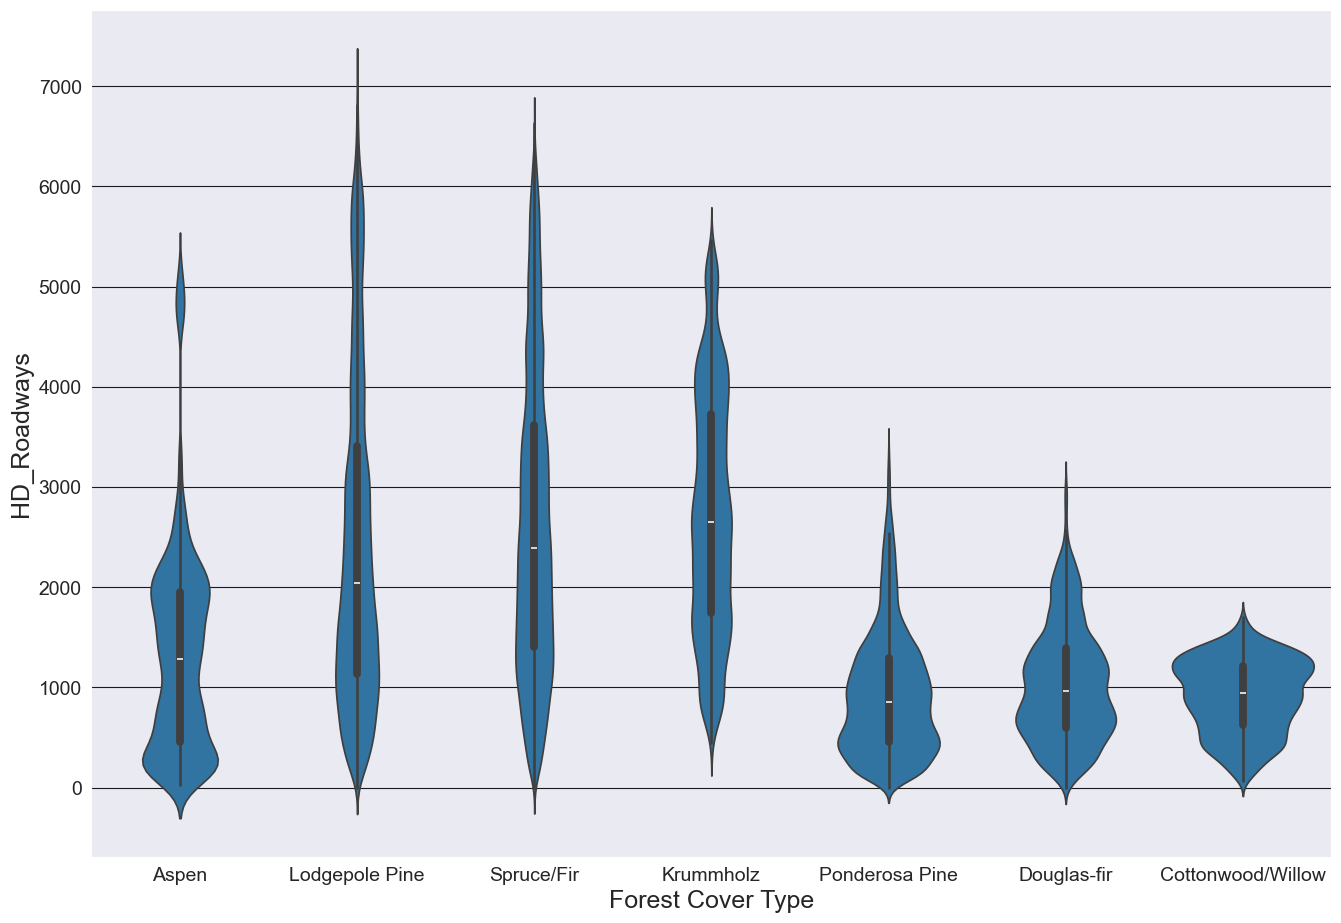

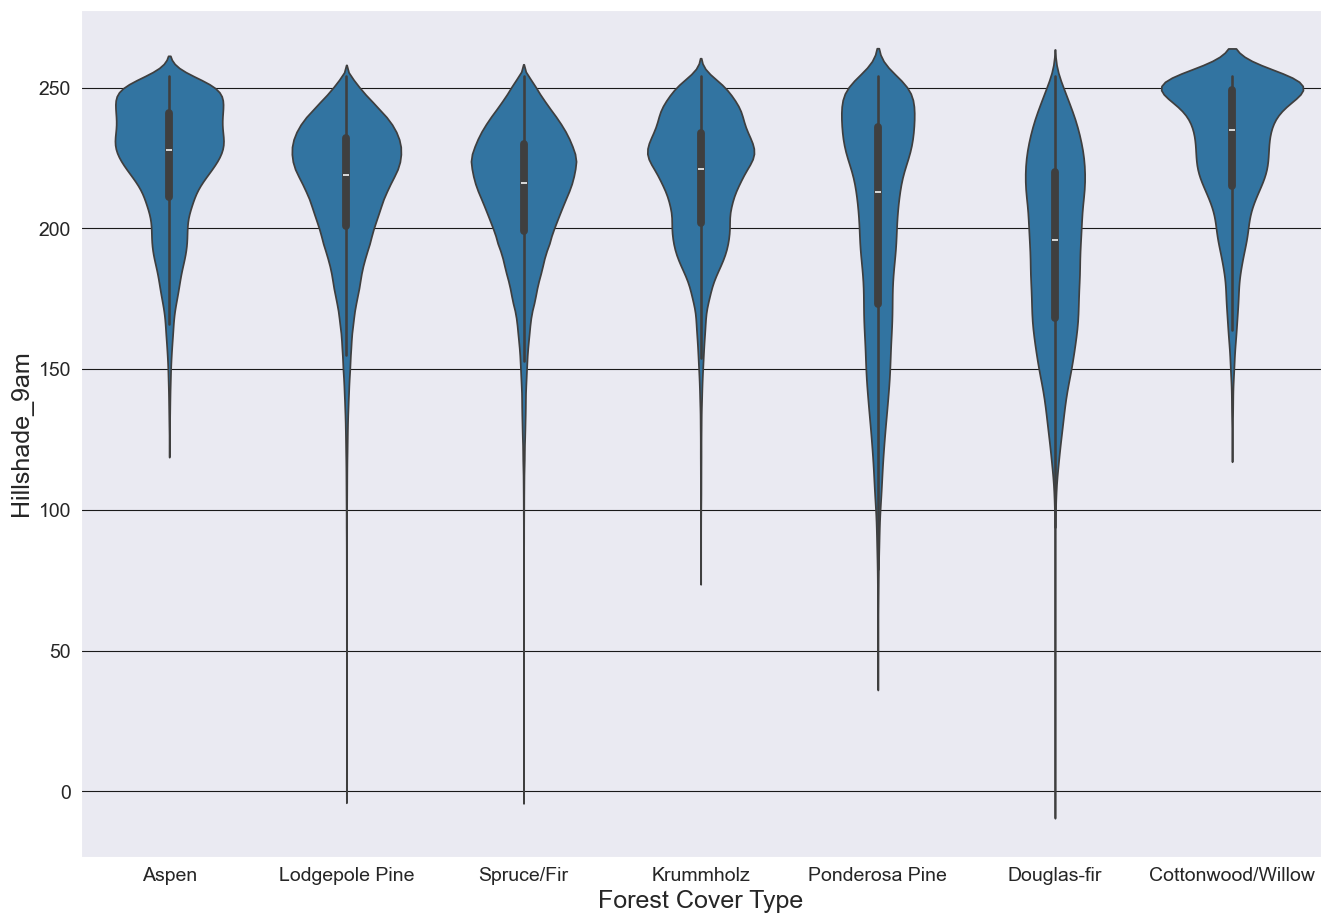

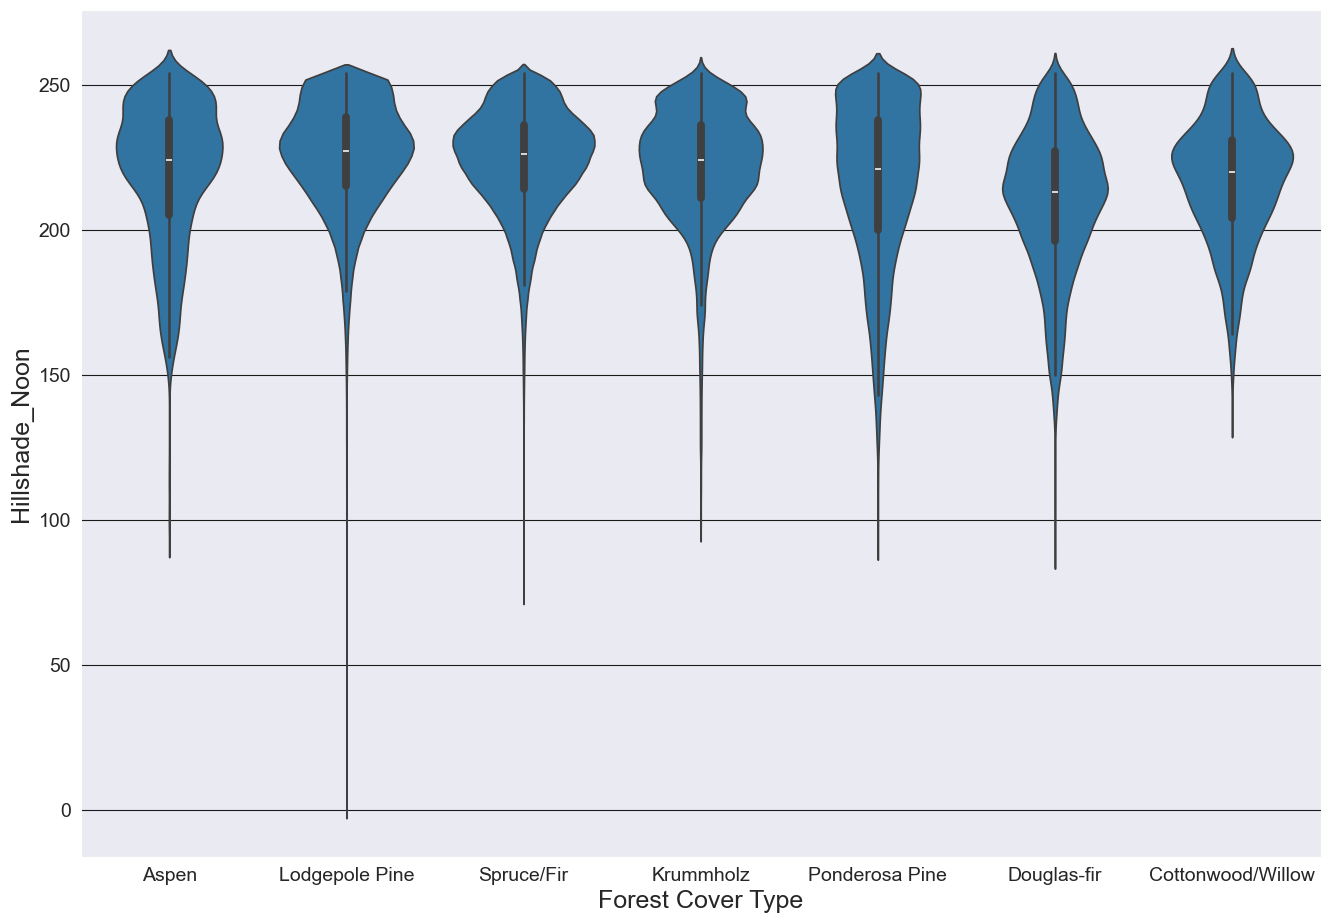

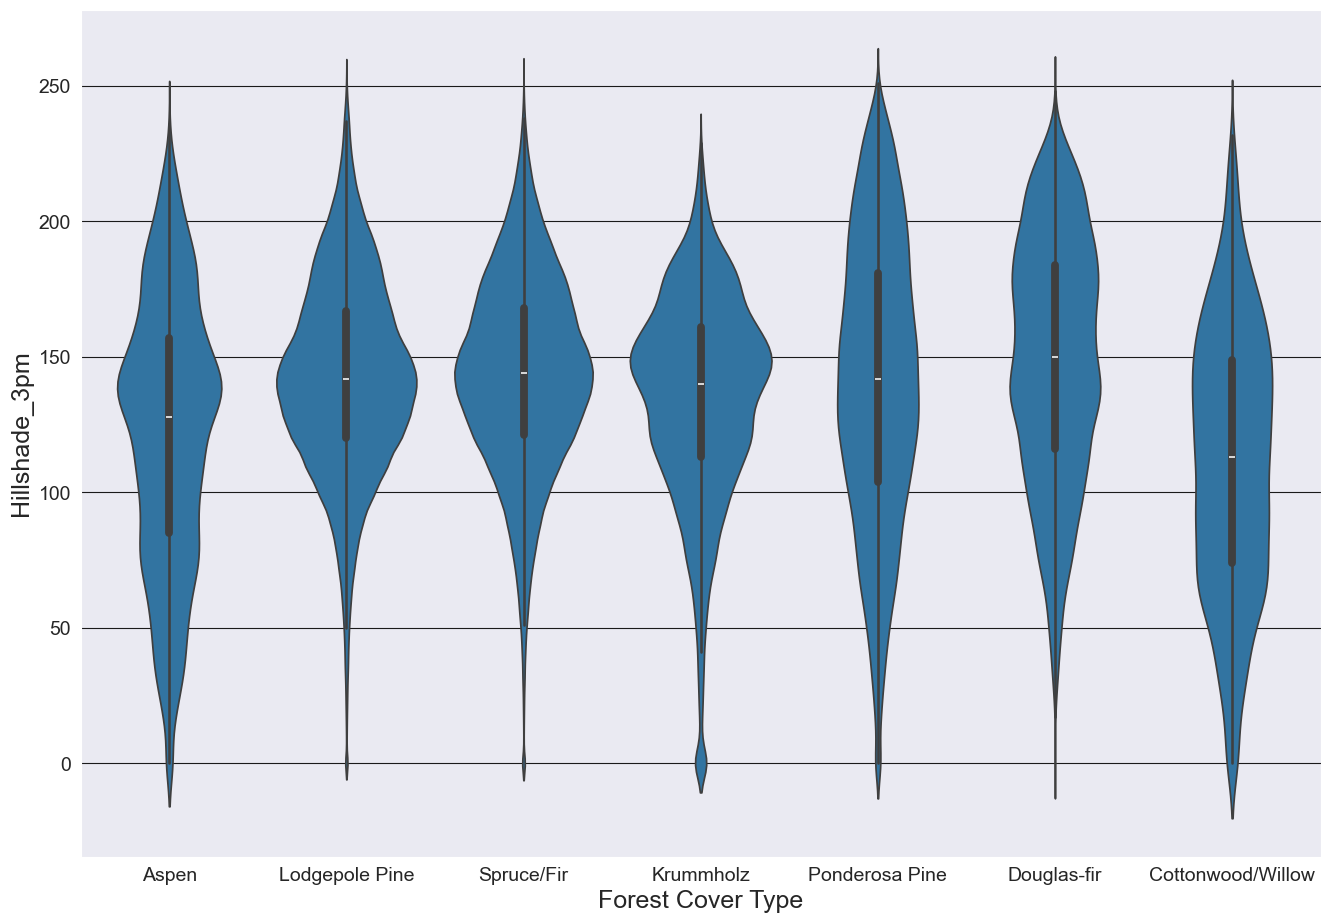

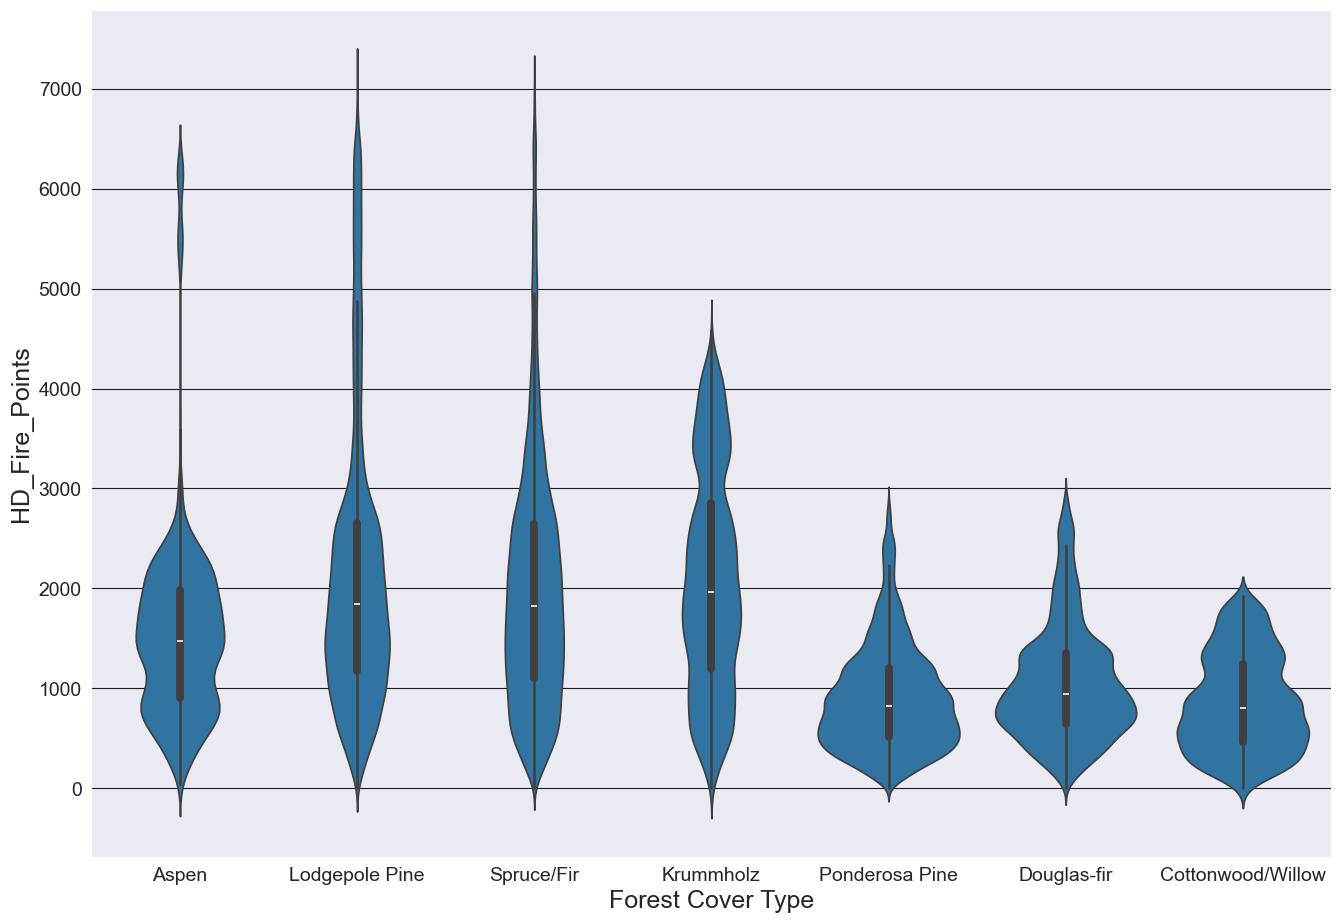

In [36]:
# Extract all numeric features for train
num_features = df.iloc[:,:10]

# plot bg
sns.set_style('darkgrid',{"grid.color": "0.1"})

# set target variable
target = df['Cover_Type']

# features to be compared with target variable
features = num_features.columns

# loop for violin plot
for i in range(0, len(features)):
    plt.figure(figsize=(16, 11))
    sns.violinplot(data=num_features,x=target, y=features[i])
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.xlabel('Forest Cover Type', size=18)
    plt.ylabel(features[i], size=18)
    plt.show()

inferences
- Elevation
    - 'Cottonwood/Willow' has the most forest cover at elevation between 2000m - 2500m.
    - 'Krummmholz' has obseravtions of most elevated trees ranging as low as ~2800m to as high as ~3800m
- Aspect
    - This feature has normal distribution for each class
- Slope
    - Slope has lower values compared to most features as its measured in degrees and least to Aspect which is also measured in degrees.
    - It has the least maximum value of all features. Looking at the plot we can say that it belongs to Cover_Type2.
    - All clases have dense slope observations between 0-20 degrees
- Hillshade_9am and Hillshade_Noon are left or negatively skewed distribution where they take on max values between 200-250 index value for most observations in each class

<Axes: xlabel='Hillshade_Noon', ylabel='Hillshade_3pm'>

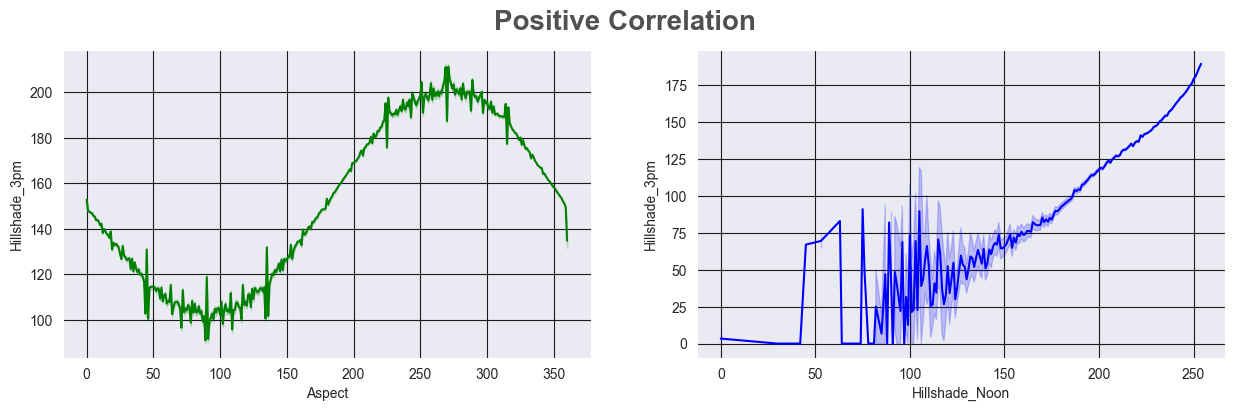

In [38]:
fig , axs = plt.subplots(ncols= 2, figsize=(15, 4))
fig.suptitle("Positive Correlation", fontsize=20, fontweight='bold', alpha=0.8)

sns.lineplot(x="Aspect", y="Hillshade_3pm", data=df,color='green', ax=axs[0])
sns.lineplot(x="Hillshade_Noon", y="Hillshade_3pm", data=df,color='blue', ax=axs[1])

<Axes: xlabel='Hillshade_Noon', ylabel='Slope'>

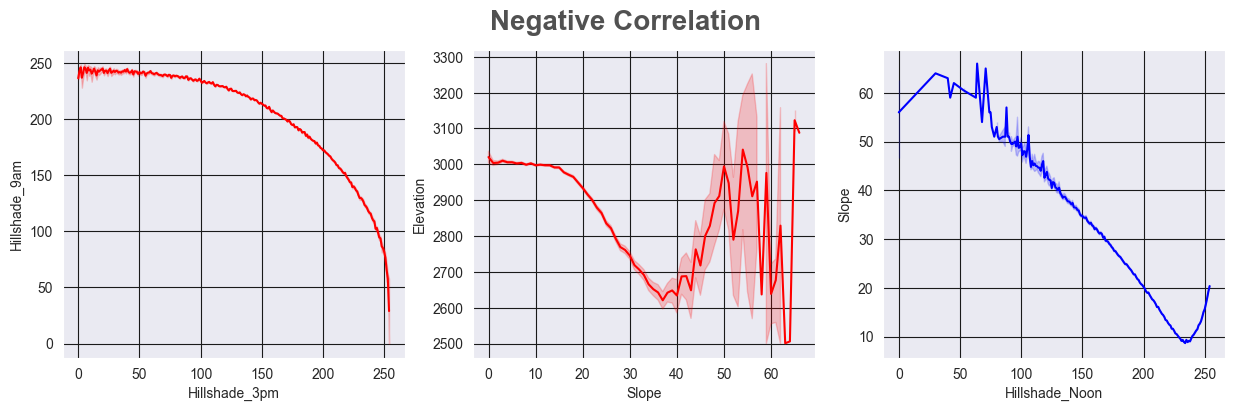

In [39]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 4))
fig.suptitle("Negative Correlation", fontsize=20, fontweight='bold', alpha=0.8)

sns.lineplot(x="Hillshade_3pm", y="Hillshade_9am", data=df, color='red', ax=axs[0])
sns.lineplot(x="Slope", y="Elevation", data=df, color='red', ax=axs[1])
sns.lineplot(x="Hillshade_Noon", y="Slope", data=df, color='blue', ax=axs[2])

Final Report
- Forest Cover type 'Lodgepole Pine' has the largest forest cover and 'Cottonwood/Willow' has the lowest forest cover
- Cache_La_Poudre and Neota Wilderness Areas have the same number of forest covers
- Most of the data is abundant with soil types 29 and 23
- There is a positive correlation between Elevation and Distance to Roadways
- There is a negative correlation between hillshade index at 9am and 3pm.
- Horizontal_Distance_To_Roadways has the most spread out data of all features.
- 'Cottonwood/Willow' has the most forest cover at elevation between 2000m ~ 2500m